## Project 4 - Predictive Analysis using scikit-learn
### by Bogdan Popa

Using scikit-learn surpervised machine learning I will analyse the mushroom dataset from the UCI repository and determine if the "odor" or "cap-color" column better predicts if a mushroom is poisonous.

To start I will import all the libraries needed.

In [12]:
# starting with pandas
import pandas as pd
# numpy for calculations
import numpy as np
# matplotlib for graphically representing the data
import matplotlib.pyplot as plt
# importing sklearn for surpevise learning and prediction modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Next let's take a look at the data and transform it to meet our needs. The mushroom data set has 23 columlns representing different attributes of mushrooms. Each atribute is represented by a symbol which is explained in the dataset's documentation file.

In [13]:
# Read the data and assign it to the data dataset. The data does not have a header row.
data = pd.read_csv('agaricus-lepiota.data', sep=",", header=None)

# Adding headers to each of the 23 columns based on the information found on the UCI repository 
data.columns =["edible/poisonous","cap-shape","cap-surface","cap-color","bruises","odor",
              "gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root",
              "stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring",
              "stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type",
              "spore-print-color","population","habitat"]


# Verifing that the data was imported
data.head()

,edible/poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
data.shape

(8124, 23)

The data set has 8124 rows and 23 columns.

### "Edible/Poisonous", "Odor", and "Cap-color" dataset

For the project we only the "Edible/Poisonous", "Odor", and "Cap-color" columns are needed. I create a new dataset, called "newdf", using only the 3 columns

In [15]:
newdf = data.filter(['edible/poisonous','odor','cap-color'])
newdf.head()

,edible/poisonous,odor,cap-color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g


Scikit-learn can only interpret numeric data. Therefore, the newdf data needs to be converted to numeric. Each code will be converted to a numerical value using the following tables:


| Edible/Poisonous | Code | Numeric Value |
| :- | :- | :- |
| Edible | e | 0 |
| Poisonous | p | 1 |


| Odor | Code | Numeric Value |
| :- | :- | :- |
| almond | a | 1 |
| anise | l | 2 |
| creosote | c | 3 |
| fishy | y | 4 |
| foul | f | 5 |
| musty | m | 6 |
| none | n | 0 |
| pungent | p | 7 |
| spicy | s | 8 |


| Cap Color | Code | Numeric Value |
| :- | :- | :- |
| brown | n | 0 |
| buff | b | 1 |
| cinnamon | c | 2 |
| gray | g | 3 |
| green | r | 4 |
| pink | p | 5 |
| purple | u | 6 |
| red | e | 7 |
| white | w | 8 |
| yellow | y | 9 |

In [16]:
# Replacing codes in each columln with the nulmeric values found above.
newdf['edible/poisonous']=newdf['edible/poisonous'].replace({'e':0,'p':1})
newdf['odor']=newdf['odor'].replace({'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':0,'p':7,'s':8})
newdf['cap-color']=newdf['cap-color'].replace({'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9})

# printing the header to verify
newdf.head()

,edible/poisonous,odor,cap-color
0,1,7,0
1,0,1,9
2,0,2,8
3,1,7,8
4,0,0,3


### Machine learning

Now that the data frame is ready for Scikit-learn it is time to assing what data will be used as features and which column will bbe the observation.

In the case of the mushroom dataset the target or observation column will be the "edible/poisonous" column and the features or predictor columns will be the "odor" and "cap-color" columns.



In [17]:
# Selecting thhe feature columns
feature_cols = ['odor','cap-color']
# Assigning the feature columns to X
X=newdf[feature_cols]

# Assigning the target values to y
y = newdf['edible/poisonous']

I will use the train_test_split function to split the data into trainning data and testing data with a ration of 70 (trainning data) and 30 (testing data).

Using a 'for' loop I will test the accuracy of n_neighbors K value.

In [18]:
# Using the train_test_split method to devide the dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state=10)

# select a range for K to test whcih value is most accurate
k_range=range(1,80)
k_scores =[]
for k in k_range:
    # for each k value between 1 and 80 perform the following
    knn = KNeighborsClassifier(n_neighbors=k)
    # recird the accuracy score
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

To visualize which K value was most accurate I wil plot the data from k_scores.

Text(0, 0.5, 'Cross-Validated Accuracy')

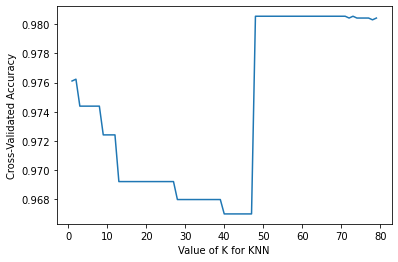

In [19]:
%matplotlib inline
# plot the data
plt.plot(k_range, k_scores)
# label the axis
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

The plotted data shows that K values between 50 and 70 are the most accurate with an accuracy rating of 98%.

Going forward I will set the n_neighbors value to 50.

Next it is time to test how accurate using both 'odor' and 'cap-color' is to determining if a mushroom is poisonous.

In [20]:
# setting the n_neighbors to 50
knn = KNeighborsClassifier(n_neighbors=50)
# training the model
knn.fit(X_train, y_train)
# testing the model and saving the predictiions to to y_pred
y_pred = knn.predict(X_test)
# comparing the test with the predictions and determining accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9860541427399507


The result of this prediction model is that "Odor" and "Cap-color" together can accuretely predict if a mushroom is poisonous 98.6% of the time.

However the task is to determine which of the two features is more accurate in predicting poisonous mushrooms. Therefore, next I will rerun the macine modeling for each of the two colulmns individually. 

In [21]:
#set the feature column to 'odor'
feature_cols = ['odor']
X=newdf[feature_cols]

# rerun same parameters as before for only the 'odor' columln
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state=10)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9860541427399507


The mushrooms odor alone can predict if a mushroom is poisonous 98.6% of the time. Next let's look at the 'cap-color' by it's self.

In [22]:
# setting the feature column to 'cap-color'
feature_cols = ['cap-color']
X=newdf[feature_cols]

# keeping everything else the same
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state=10)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5680885972108285


The result is that "cap-color" can only predict poisonous mushroom 56.8% of the time

### Conclusion
 Using surpervised machine learning I was able to determine that 'Odor' is far more likely to determine if a mushroom is poisonous than 'cap color'. The odor feature alone was able to predict if a mushroom was poisonous 98.6% of the time. The cap-color feature did so only 56.8% of the time.